### Importing all required Libraries

In [1]:
import pandas as pd, numpy as np , matplotlib.pyplot as plt ,seaborn as sns


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_rows', 500)

We have considered XNA and XAP as null values

In [4]:
App_data = pd.read_csv("application_data.csv", na_values = "XNA")
Prev_App_data = pd.read_csv("previous_application.csv", na_values =["XNA","XAP"])

In [5]:
App_data.shape


(307511, 122)

In [6]:
Prev_App_data.shape

(1670214, 37)

In [7]:
App_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
Prev_App_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,NaN,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,NaN,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,NaN,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,NaN,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


Lets the begin the analysis using the current application data(App_data)

In [9]:
App_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [10]:
App_data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

In [11]:
null = pd.DataFrame((App_data.isnull().sum()*100)//App_data.shape[0]).reset_index()

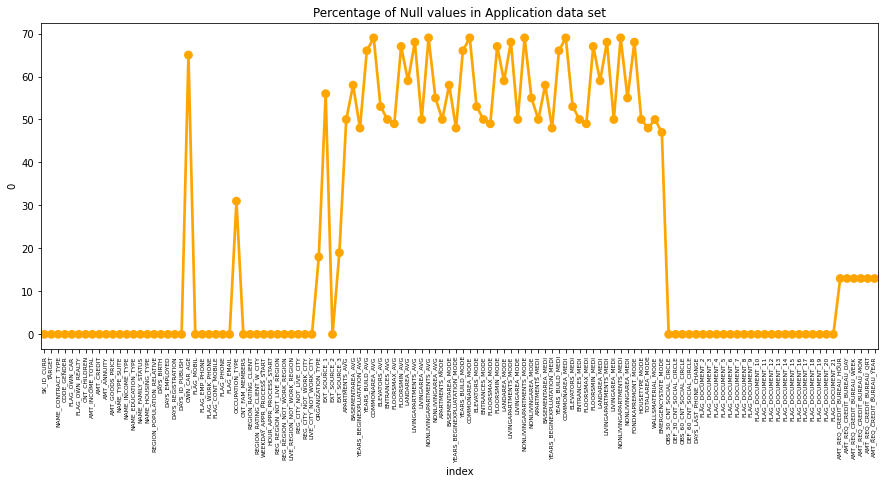

In [12]:
plt.figure(figsize=(15,6))
sns.pointplot("index",0,data=null,color = 'orange')
plt.xticks(rotation =90,fontsize =6)
plt.title("Percentage of Null values in Application data set")
plt.show()

It is evident from the above graph that for many columns the percentage of Null values is more than 50 %

### Check for Null Values

Lets check for the number of columns which have null values more than 40%.

In [13]:
null_cols = App_data.isnull().sum()
null_cols = null_cols[null_cols.values>(0.4*len(App_data))].index
len(null_cols)

49

Dropping columns having more than 40% missing values

In [14]:
App_data.drop(labels=null_cols, axis = 1,inplace = True) 

In [15]:
App_data.shape

(307511, 73)

In [16]:
App_data.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        4
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
O

### Check for Outliers

lets check for Outliers in the Amount Income Total column to start with, 

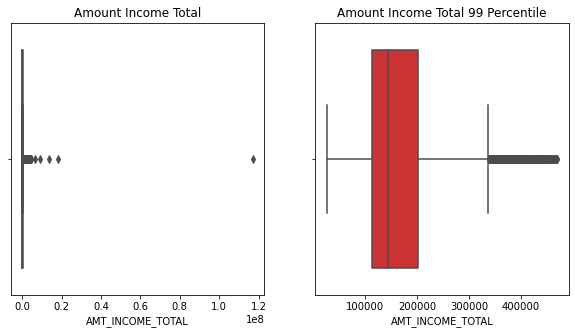

In [17]:
# Amount Income Total
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(App_data['AMT_INCOME_TOTAL'],palette="Set1")
plt.title('Amount Income Total')
plt.subplot(1,2,2)
sns.boxplot(App_data[App_data['AMT_INCOME_TOTAL'] < np.percentile(App_data['AMT_INCOME_TOTAL'],99)]['AMT_INCOME_TOTAL'],palette="Set1")
plt.title('Amount Income Total 99 Percentile')
plt.show()

It is observed that most values lie below 99 percentile. We see outliers in the Amount Income Total as it can vary due to  
age groups, occupation types and experience.

Next, checking for Outliers in Amount Credit column

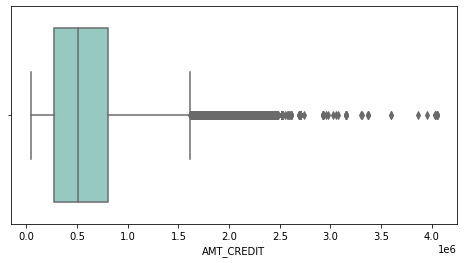

In [18]:
# Amount Credit
plt.figure(figsize=(8,4))
sns.boxplot(App_data['AMT_CREDIT'],palette="Set3")
plt.show()


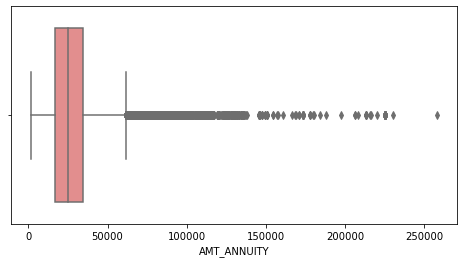

In [19]:
# Amount Annuity
plt.figure(figsize=(8,4))
sns.boxplot(App_data['AMT_ANNUITY'],color = "lightcoral")
plt.show()

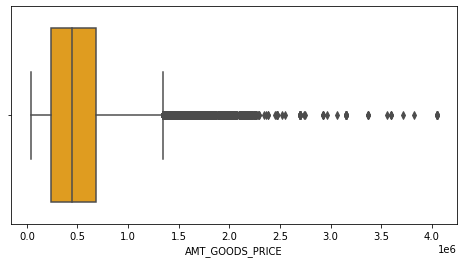

In [20]:
# Amount GOODS PRICE
plt.figure(figsize=(8,4))
sns.boxplot(App_data['AMT_GOODS_PRICE'],color = "orange")
plt.show()

### Data Imputation

In [21]:
# Code gender
App_data['CODE_GENDER'].value_counts()

F    202448
M    105059
Name: CODE_GENDER, dtype: int64

As Female category is more than male category and null value percentage is very low, we can impute it without affecting the analysis

In [22]:
App_data['AMT_ANNUITY'].isnull().sum()

12

As outliers in AMT_ANNUITY is high  we cannot use mean to impute the missing values ,Hence we can impute null values with median of the AMT_ANNUITY.

#App_data['AMT_ANNUITY'] = App_data['AMT_ANNUITY'].fillna(App_data['AMT_ANNUITY'].median())

In [23]:

App_data['ORGANIZATION_TYPE'].isnull().sum()

55374

As the missing values are around 55k in Organization type , imputation will generate bias in analysis hence we can create a 'Missing' category for null values.

#App_data.ORGANIZATION_TYPE= App_data.ORGANIZATION_TYPE.replace(np.nan, "Missing")

### Fixing  columns
###### 'DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH' have negative sign so dropping sign as Days cannot be negative

In [24]:
col = ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']
for i in col:
    App_data[i] = App_data[i].apply(lambda x:abs(x))

### Dividing dataset into 2 datasets based on Target Variable

In [25]:
df_target1 = App_data[App_data.TARGET == 1] #Defaulters
df_target0 = App_data[App_data.TARGET == 0] #NonDefaulters

### Check Imbalance

In [26]:
imbalance_ratio = round(len(df_target1)/len(df_target0),2)*100
imbalance_ratio

9.0

In [27]:
print("Imbalance ratio is " , imbalance_ratio) 

Imbalance ratio is  9.0


Imbalance can also be observed in below data

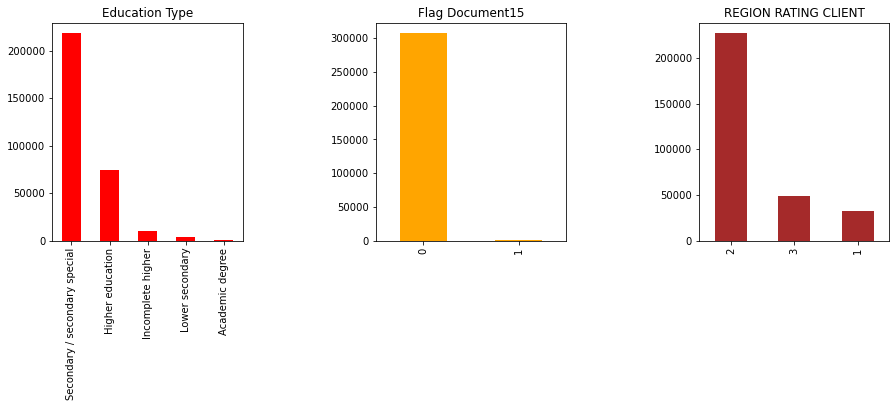

In [28]:
plt.figure(figsize=(15,4))
plt.subplots_adjust(wspace = 0.7)
plt.subplot(1,3,1)
App_data['NAME_EDUCATION_TYPE'].value_counts().plot.bar(color = "red")
plt.title('Education Type')

plt.subplot(1,3,2)
App_data['FLAG_DOCUMENT_15'].value_counts().plot.bar(color = "orange")
plt.title('Flag Document15')

plt.subplot(1,3,3)
App_data['REGION_RATING_CLIENT'].value_counts().plot.bar(color = "brown")
plt.title('REGION RATING CLIENT')
plt.show()

### Univariate analysis for numeric variables

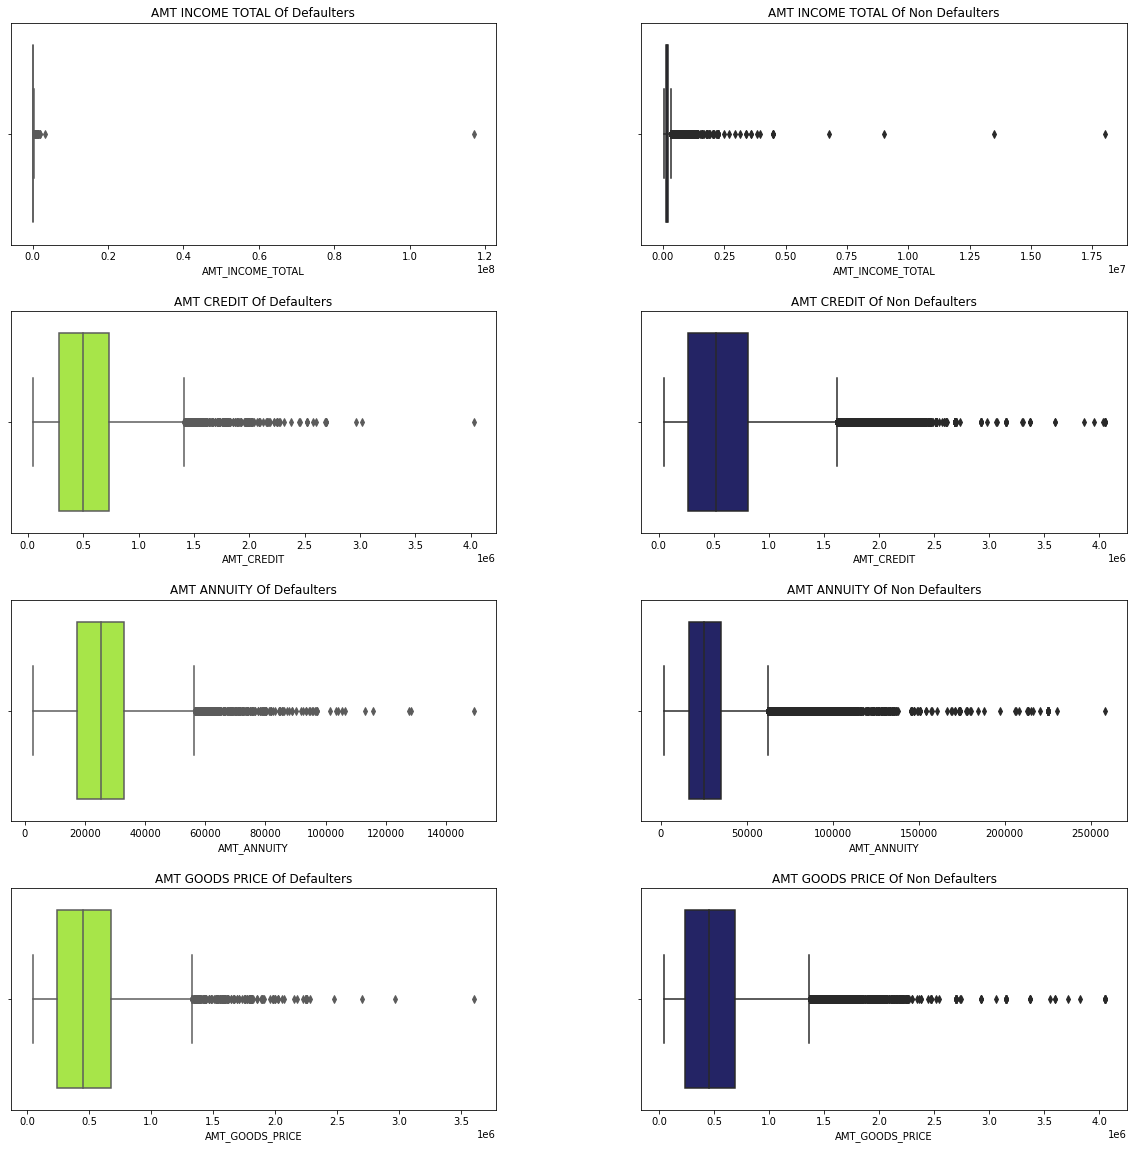

In [29]:
#AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE
plt.figure(figsize=(20,20))
plt.subplots_adjust(wspace = 0.3)
plt.subplots_adjust(hspace = 0.3)
cols = ['AMT_INCOME_TOTAL','AMT_INCOME_TOTAL', 'AMT_CREDIT','AMT_CREDIT','AMT_ANNUITY', 'AMT_ANNUITY','AMT_GOODS_PRICE','AMT_GOODS_PRICE']
count = 1
for i in cols:
    plt.subplot(4,2,count)
    if count%2==1:
        sns.boxplot(df_target1[i],color ="greenyellow")
        plt.title(i.replace('_',' ')+' Of Defaulters')
    else:
        sns.boxplot(df_target0[i],color = "midnightblue")
        plt.title(i.replace('_',' ')+' Of Non Defaulters')
    count+=1   

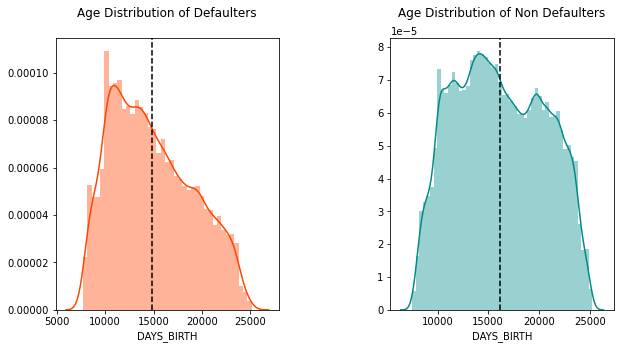

In [30]:
# DaysBirth Distribution for Defaulters and Non Defaulters
plt.figure(figsize=[10,5])
plt.subplots_adjust(wspace = 0.5)
plt.subplot(1,2,1)
sns.distplot(df_target1['DAYS_BIRTH'],color='orangered')
plt.axvline(df_target1['DAYS_BIRTH'].mean(),label = "mean",linestyle="dashed",color='k')
plt.title('Age Distribution of Defaulters\n')

plt.subplot(1,2,2)
sns.distplot(df_target0['DAYS_BIRTH'],color='darkcyan')
plt.axvline(df_target0['DAYS_BIRTH'].mean(),label = "mean",linestyle="dashed",color='k')
plt.title('Age Distribution of Non Defaulters\n')
plt.show()

The peak of defaulters is observed around the age 25 to 35, whereas the non defaulter's graph shows a wide spread in age. 
Also the mean age of defaulters is less than the mean age of non defaulters.

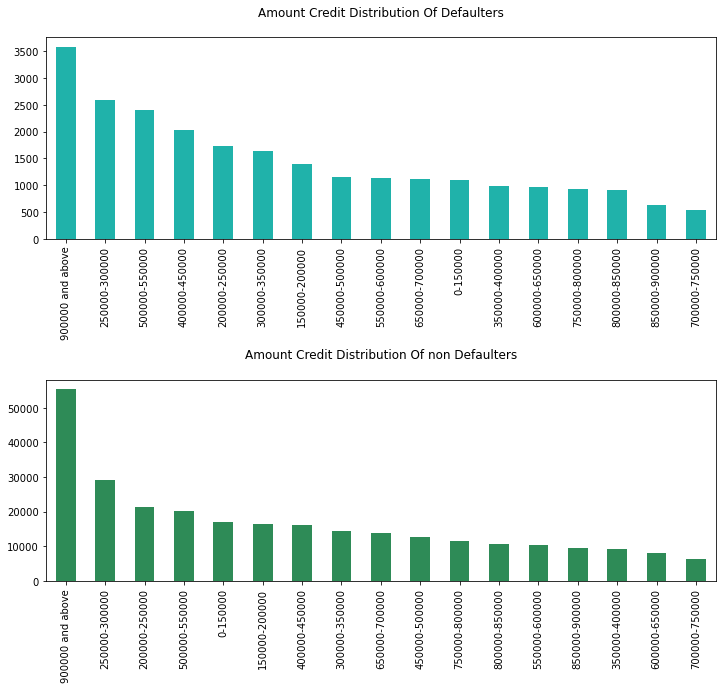

In [31]:
#Amount Credit Distribution 

plt.figure(figsize=(12,10))
bins = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
slots = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']
plt.subplots_adjust(hspace = 0.7)
plt.subplot(2,1,1)
pd.cut(df_target1['AMT_CREDIT'],bins=bins,labels=slots).value_counts().plot(kind = "bar",color = "lightseagreen")
plt.title('Amount Credit Distribution Of Defaulters\n')

plt.subplot(2,1,2)
pd.cut(df_target0['AMT_CREDIT'],bins=bins,labels=slots).value_counts().plot(kind = "bar",color = "seagreen")
plt.title('Amount Credit Distribution Of non Defaulters\n')
plt.show()


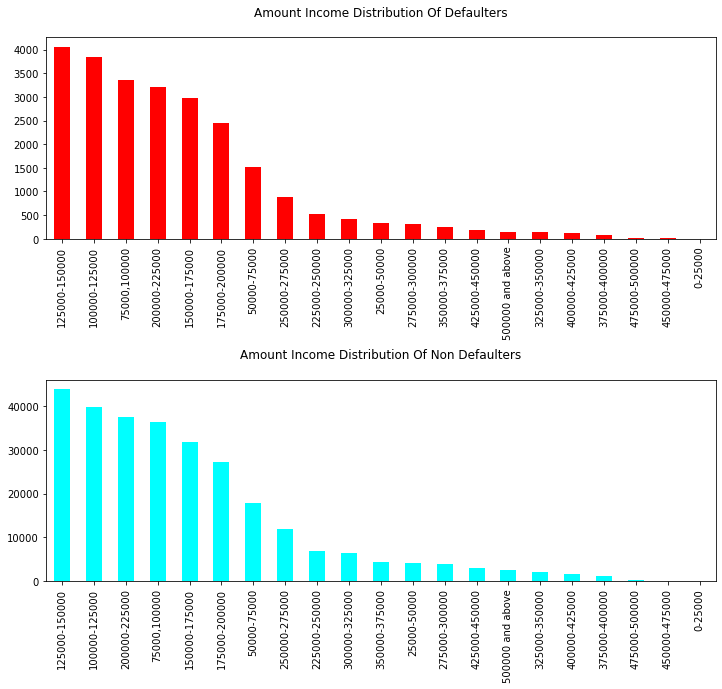

In [32]:
# Amount Income Distribution
#Additional
plt.figure(figsize=(12,10))
bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
slots = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']
plt.subplots_adjust(hspace = 0.7)
plt.subplot(2,1,1)
pd.cut(df_target1['AMT_INCOME_TOTAL'],bins=bins,labels=slots).value_counts().plot(kind = "bar",color = "red")
plt.title('Amount Income Distribution Of Defaulters\n')

plt.subplot(2,1,2)
pd.cut(df_target0['AMT_INCOME_TOTAL'],bins=bins,labels=slots).value_counts().plot(kind = "bar",color = "cyan")
plt.title('Amount Income Distribution Of Non Defaulters\n')
plt.show()

### Univariate analysis for categorical variables

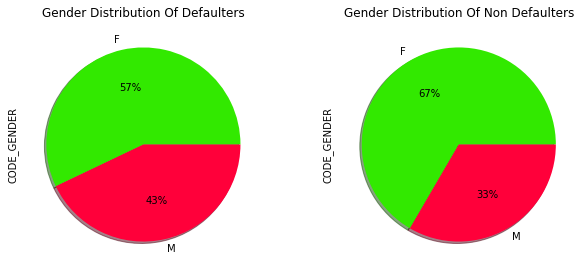

In [33]:
# Code_Gender Distibution for Defaulters and NonDefaulters
plt.figure(figsize=(10,6))
plt.subplots_adjust(wspace = 0.3)
plt.subplot(1,2,1)
df_target1['CODE_GENDER'].value_counts().plot.pie(shadow=True, autopct = "%1.0f%%",colors = sns.color_palette("prism",2))
plt.title('Gender Distribution Of Defaulters')

plt.subplot(1,2,2)
df_target0['CODE_GENDER'].value_counts().plot.pie(shadow=True,autopct = "%1.0f%%",colors = sns.color_palette("prism",2))
plt.title('Gender Distribution Of Non Defaulters')
plt.show()

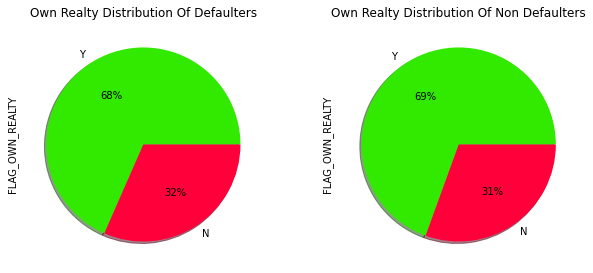

In [34]:
#Owned Reality Distribution for Defaulter and Non Defaulters
plt.figure(figsize=(10,6))
plt.subplots_adjust(wspace = 0.3)
plt.subplot(1,2,1)
df_target1['FLAG_OWN_REALTY'].value_counts().plot.pie(shadow=True, autopct = "%1.0f%%",colors = sns.color_palette("prism",2))
plt.title('Own Realty Distribution Of Defaulters')

plt.subplot(1,2,2)
df_target0['FLAG_OWN_REALTY'].value_counts().plot.pie(shadow=True,autopct = "%1.0f%%",colors = sns.color_palette("prism",2))
plt.title('Own Realty Distribution Of Non Defaulters')
plt.show()

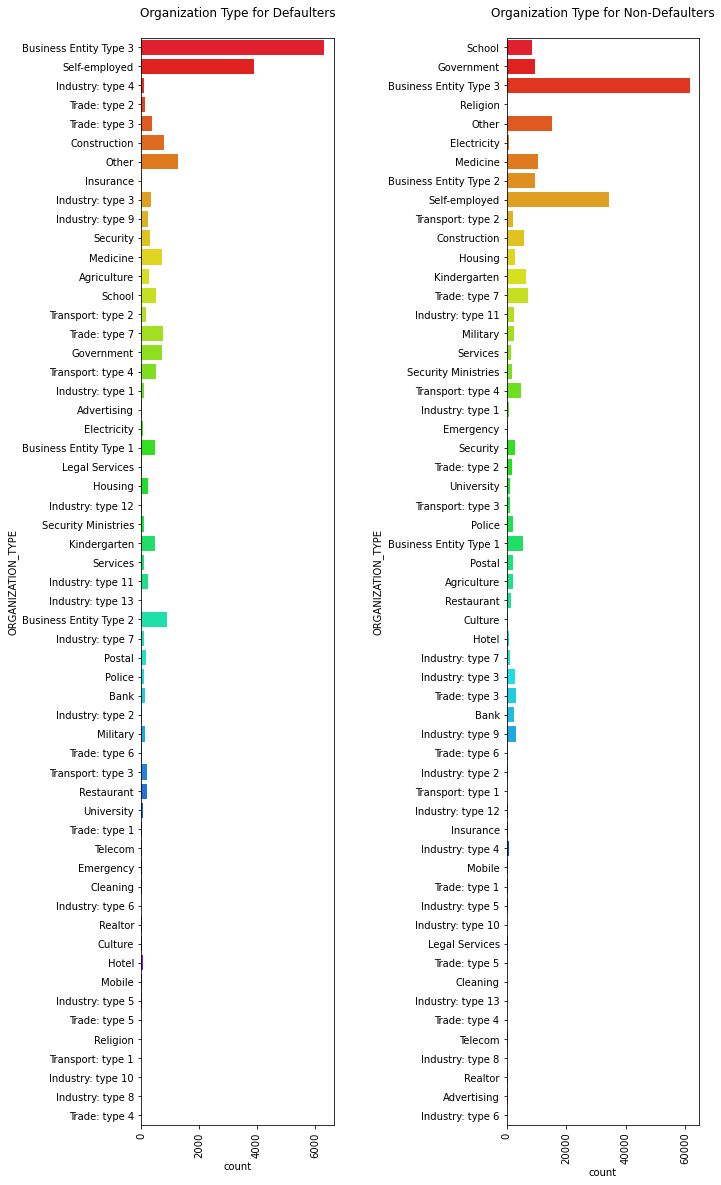

In [35]:
#Organization Type
plt.figure(figsize=[10,20])
plt.subplots_adjust(wspace = 0.9)
plt.subplot(1,2,1)
#Organization Type Countplot for defaulters
sns.countplot(y=df_target1['ORGANIZATION_TYPE'],palette="gist_rainbow")
plt.xticks(rotation=90)
plt.title('Organization Type for Defaulters\n')

#Organization Type Countplot for Nondefaulters
plt.subplot(1,2,2)
sns.countplot(y=df_target0['ORGANIZATION_TYPE'],palette="gist_rainbow")
plt.xticks(rotation=90)
plt.title('Organization Type for Non-Defaulters\n')

plt.show()

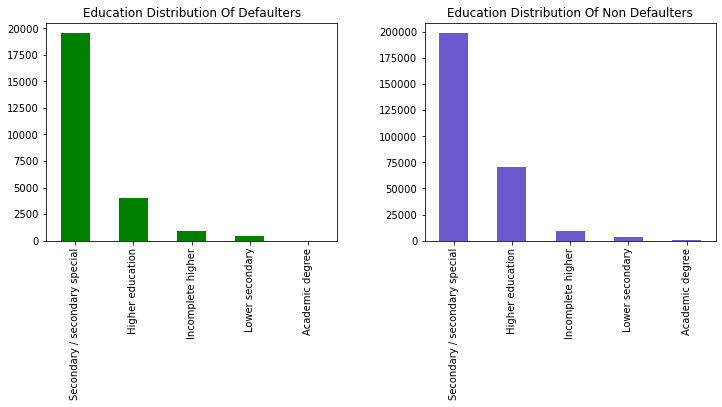

In [36]:
#Education type
plt.figure(figsize=(12,4))
plt.subplots_adjust(wspace = 0.3)
plt.subplot(1,2,1)
df_target1['NAME_EDUCATION_TYPE'].value_counts().plot.bar(color ="green")
plt.title('Education Distribution Of Defaulters')

plt.subplot(1,2,2)
df_target0['NAME_EDUCATION_TYPE'].value_counts().plot.bar(color ="slateblue")
plt.title('Education Distribution Of Non Defaulters')
plt.show()

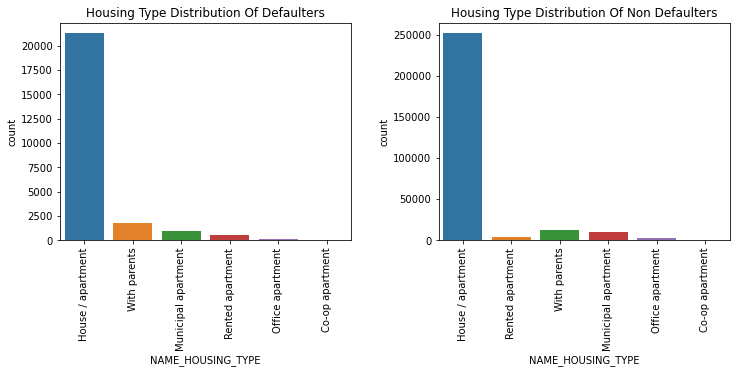

In [37]:
#Housing Type distribution
#Additional
plt.figure(figsize=(12,4))
plt.subplots_adjust(wspace = 0.3)
plt.subplot(1,2,1)
sns.countplot(df_target1['NAME_HOUSING_TYPE'])
plt.xticks(rotation=90)
plt.title('Housing Type Distribution Of Defaulters')

plt.subplot(1,2,2)
sns.countplot(df_target0['NAME_HOUSING_TYPE'])
plt.xticks(rotation=90)
plt.title('Housing Type Distribution Of Non Defaulters')
plt.show()

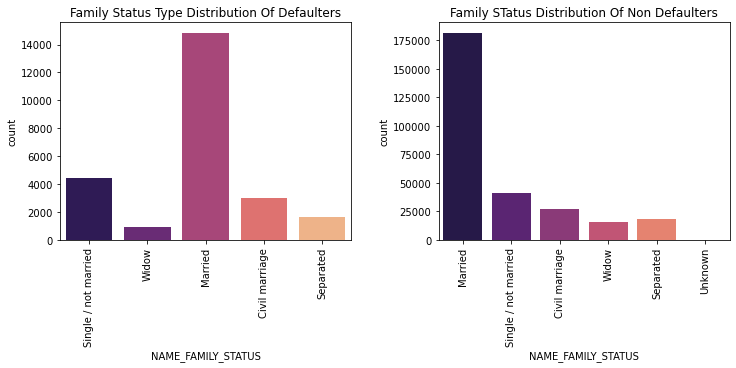

In [38]:
#Add more categories
#Housing Type distribution
#Additional
plt.figure(figsize=(12,4))
plt.subplots_adjust(wspace = 0.3)
plt.subplot(1,2,1)
sns.countplot(df_target1['NAME_FAMILY_STATUS'],palette='magma')
plt.xticks(rotation=90)
plt.title('Family Status Type Distribution Of Defaulters')

plt.subplot(1,2,2)
sns.countplot(df_target0['NAME_FAMILY_STATUS'],palette='magma')
plt.xticks(rotation=90)
plt.title('Family STatus Distribution Of Non Defaulters')
plt.show()

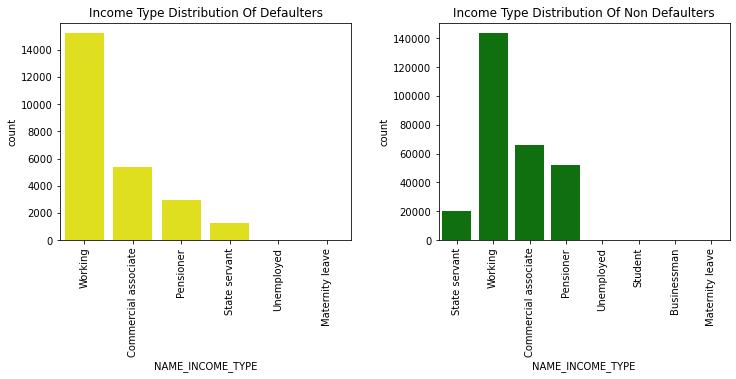

In [39]:
#Income type Distribution for Defaulters and Non Defaulters
plt.figure(figsize=(12,4))
plt.subplots_adjust(wspace = 0.3)
plt.subplot(1,2,1)
sns.countplot(df_target1['NAME_INCOME_TYPE'],color='yellow')
plt.xticks(rotation=90)
plt.title('Income Type Distribution Of Defaulters')

plt.subplot(1,2,2)
sns.countplot(df_target0['NAME_INCOME_TYPE'],color='green')
plt.xticks(rotation=90)
plt.title('Income Type Distribution Of Non Defaulters')
plt.show()

### Bivariate Analysis for Numerical Variables

<Figure size 1080x1296 with 0 Axes>

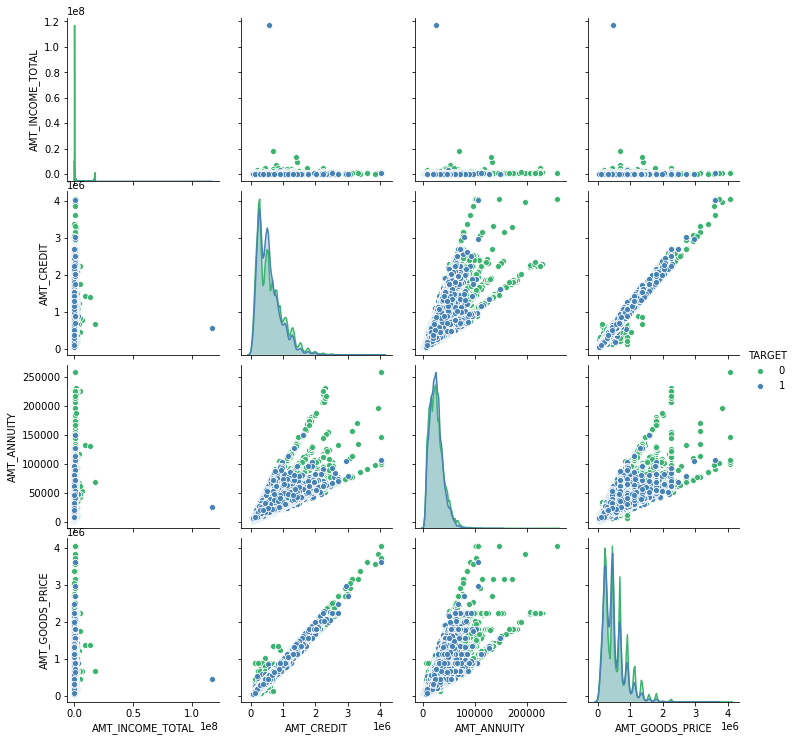

In [40]:
#Pairplot for numeric variables
plt.figure(figsize=[15,18])
sns.pairplot(App_data[['AMT_INCOME_TOTAL', 'AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE','TARGET']],hue='TARGET',palette=["mediumseagreen","steelblue"])
plt.show()

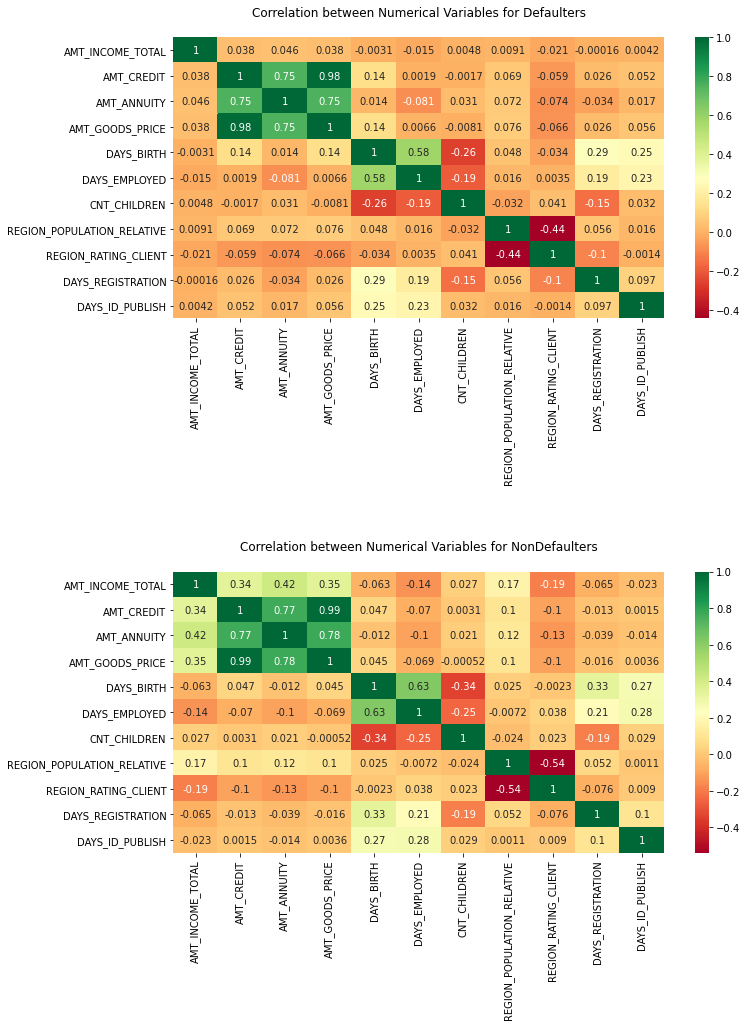

In [41]:
#Correlation between Numerical Variables

plt.figure(figsize=[11,15])
plt.subplots_adjust(hspace = 0.9)
plt.subplot(2,1,1)
sns.heatmap(df_target1[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_BIRTH','DAYS_EMPLOYED','CNT_CHILDREN','REGION_POPULATION_RELATIVE','REGION_RATING_CLIENT','DAYS_REGISTRATION','DAYS_ID_PUBLISH']].corr(),cmap="RdYlGn",annot=True)
plt.title('Correlation between Numerical Variables for Defaulters\n')

plt.subplot(2,1,2)
sns.heatmap(df_target0[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_BIRTH','DAYS_EMPLOYED','CNT_CHILDREN','REGION_POPULATION_RELATIVE','REGION_RATING_CLIENT','DAYS_REGISTRATION','DAYS_ID_PUBLISH']].corr(),cmap="RdYlGn",annot=True)
plt.title('Correlation between Numerical Variables for NonDefaulters\n')

plt.show()

### Top 10 Correlation for Defaulters

In [42]:
corr=df_target1.corr()
corr=corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
corr_df=corr.abs().unstack().reset_index()
corr_df.columns=['COL1','COL2','correlation']
corr_df.correlation=round(corr_df.correlation*100,2)
corr_df.dropna(subset=['correlation'],inplace=True)
corr_df.sort_values('correlation',ascending=False).head(10)

,COL1,COL2,correlation
802,FLAG_EMP_PHONE,DAYS_EMPLOYED,99.97
1982,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,99.83
370,AMT_GOODS_PRICE,AMT_CREDIT,98.31
1239,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,95.66
1100,CNT_FAM_MEMBERS,CNT_CHILDREN,88.55
2044,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,86.90
1487,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,84.79
1673,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,77.85
371,AMT_GOODS_PRICE,AMT_ANNUITY,75.27
309,AMT_ANNUITY,AMT_CREDIT,75.22


### Top 10 Correlation for Non-Defaulters

In [43]:
corr=df_target0.corr()
corr=corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
corr_df=corr.abs().unstack().reset_index()
corr_df.columns=['COL1','COL2','correlation']
corr_df.correlation=round(corr_df.correlation*100,2)
corr_df.dropna(subset=['correlation'],inplace=True)
corr_df.sort_values('correlation',ascending=False).head(10)

,COL1,COL2,correlation
802,FLAG_EMP_PHONE,DAYS_EMPLOYED,99.98
1982,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,99.85
370,AMT_GOODS_PRICE,AMT_CREDIT,98.73
1239,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,95.01
1100,CNT_FAM_MEMBERS,CNT_CHILDREN,87.86
1487,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,86.19
2044,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,85.93
1673,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,83.04
371,AMT_GOODS_PRICE,AMT_ANNUITY,77.67
309,AMT_ANNUITY,AMT_CREDIT,77.13


### Bivariate Analysis for Numerical-Categorical Variables

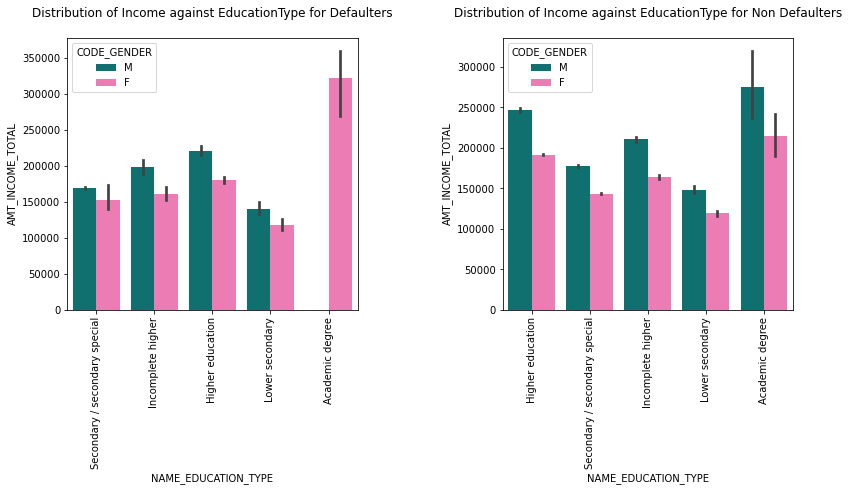

In [44]:
##Education Type vs amount
plt.figure(figsize=[13,5])
plt.subplots_adjust(wspace = 0.5)
plt.subplot(1,2,1)
sns.barplot(data=df_target1,x='NAME_EDUCATION_TYPE', y='AMT_INCOME_TOTAL',hue='CODE_GENDER',hue_order=['M','F'],palette=["teal","hotpink"])
plt.title('Distribution of Income against EducationType for Defaulters\n')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.barplot(data=df_target0,x='NAME_EDUCATION_TYPE', y='AMT_INCOME_TOTAL',hue='CODE_GENDER',hue_order=['M','F'],palette=["teal","hotpink"])
plt.xticks(rotation=90)
plt.title('Distribution of Income against EducationType for Non Defaulters\n')
plt.show()

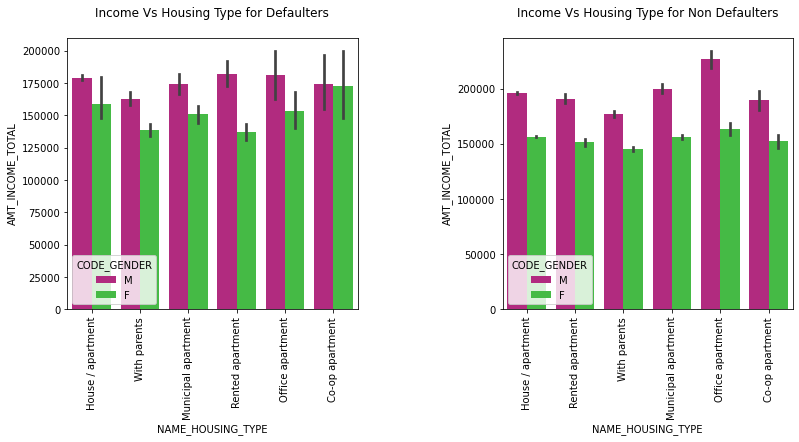

In [45]:
#Housing Type against Income 
plt.figure(figsize=[13,5])
plt.subplots_adjust(wspace = 0.5)
plt.subplot(1,2,1)
sns.barplot(data=df_target1,x='NAME_HOUSING_TYPE', y='AMT_INCOME_TOTAL',hue='CODE_GENDER',hue_order=['M','F'],palette=["mediumvioletred","limegreen"])
plt.title('Income Vs Housing Type for Defaulters\n')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.barplot(data=df_target0,x='NAME_HOUSING_TYPE', y='AMT_INCOME_TOTAL',hue='CODE_GENDER',hue_order=['M','F'],palette=["mediumvioletred","limegreen"])
plt.xticks(rotation=90)
plt.legend(title = 'CODE_GENDER',loc=3)
plt.title('Income Vs Housing Type for Non Defaulters\n')
plt.show()

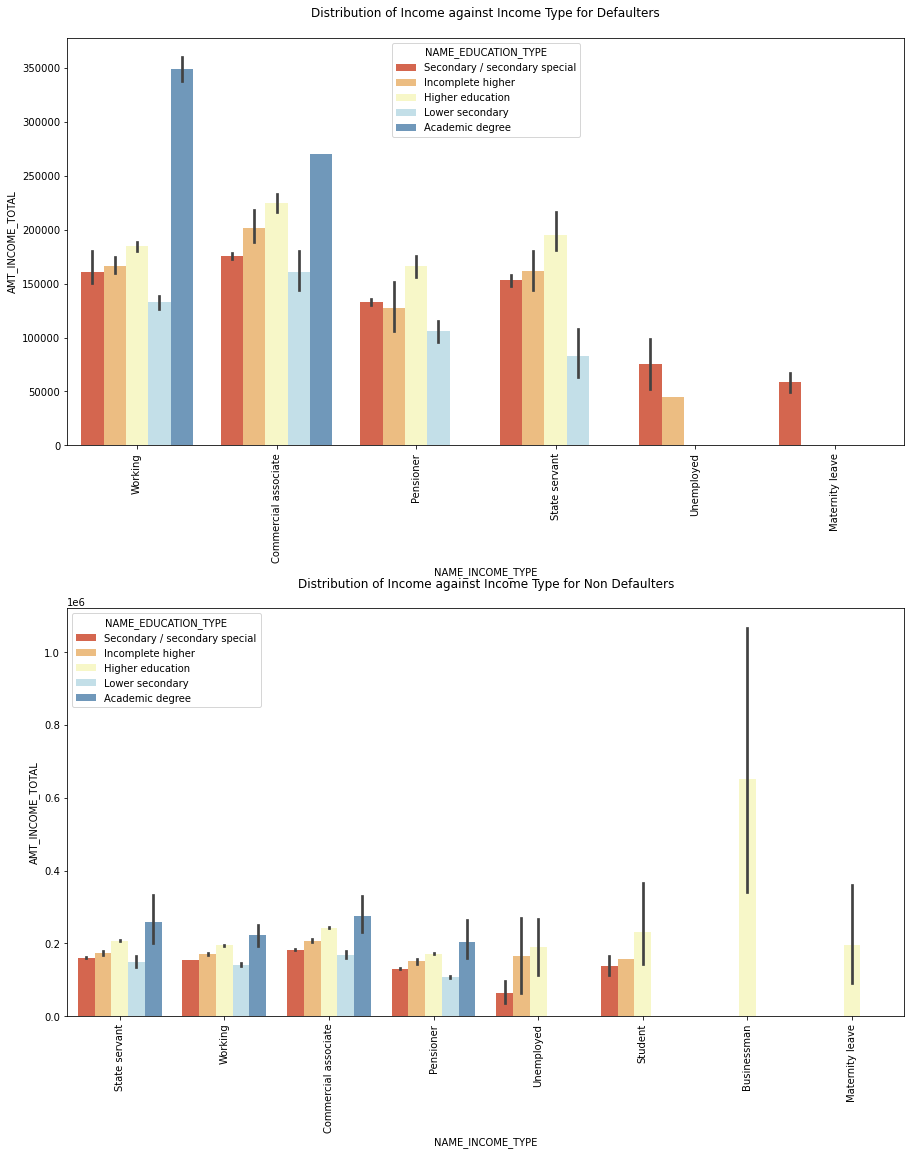

In [46]:
# Income Type against Income for defaulters and nonDefaulters
plt.figure(figsize=[15,18])
plt.subplots_adjust(hspace = 0.4)
vhue = df_target1['NAME_EDUCATION_TYPE'].unique()

plt.subplot(2,1,1)
sns.barplot(data=df_target1,x='NAME_INCOME_TYPE', y='AMT_INCOME_TOTAL',hue='NAME_EDUCATION_TYPE',hue_order=vhue,palette= "RdYlBu")
plt.title('Distribution of Income against Income Type for Defaulters\n')
plt.xticks(rotation=90)

plt.subplot(2,1,2)
sns.barplot(data=df_target0,x='NAME_INCOME_TYPE', y='AMT_INCOME_TOTAL',hue='NAME_EDUCATION_TYPE',hue_order=vhue,palette= "RdYlBu")
plt.xticks(rotation=90)
plt.title('\nDistribution of Income against Income Type for Non Defaulters\n')
plt.show()

### Merging previous application and current application data

Merging Previous application data with the current application data using the 'SK_ID_curr' column

In [47]:
all_applications=pd.merge(App_data,Prev_App_data,how='inner',on='SK_ID_CURR')

In [48]:
all_applications.shape

(1413701, 109)

In [49]:
all_applications.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,NaN,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0


In [50]:
target0 = all_applications[all_applications.TARGET == 0] #NonDefaulters
target1 = all_applications[all_applications.TARGET == 1] #Defaulters

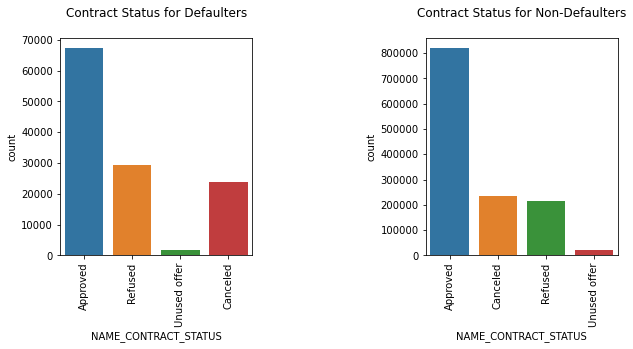

In [51]:
plt.figure(figsize=[10,4])
plt.subplots_adjust(wspace = 0.9)
plt.subplot(1,2,1)
#Contract status Countplot for Defaulters
sns.countplot(x=all_applications[all_applications['TARGET']==1]['NAME_CONTRACT_STATUS'])
plt.xticks(rotation=90)
plt.title('Contract Status for Defaulters\n')

#Contract status Countplot for NonDefaulters
plt.subplot(1,2,2)
sns.countplot(x=all_applications[all_applications['TARGET']==0]['NAME_CONTRACT_STATUS'])
plt.xticks(rotation=90)
plt.title('Contract Status for Non-Defaulters\n')

plt.show()

Refused applications for defaulters is more than that for non defaulters

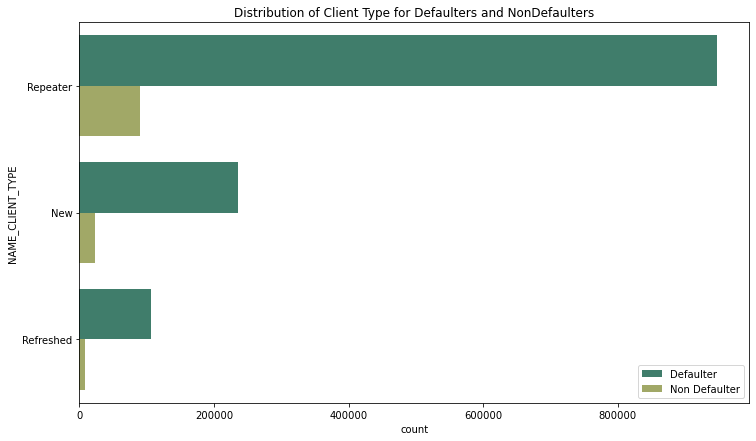

In [52]:
plt.figure(figsize=(12,7))
# Countplot for Client Type
sns.countplot(y=all_applications["NAME_CLIENT_TYPE"],
              hue=all_applications["TARGET"],palette="gist_earth",
              order=all_applications["NAME_CLIENT_TYPE"].value_counts().index[:5])
plt.title("Distribution of Client Type for Defaulters and NonDefaulters")
plt.legend(['Defaulter','Non Defaulter'])
plt.show()

We observe huge number of non-defaulters repeatedly applying for loans.  

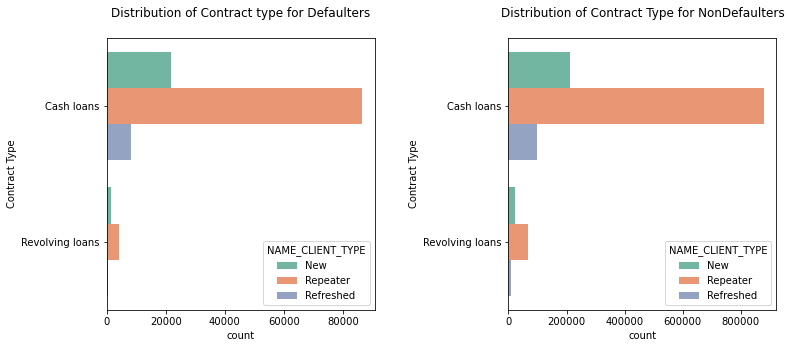

In [53]:
plt.figure(figsize=(12,5))
plt.subplots_adjust(wspace = .5)
plt.subplot(121)
vhue=['New','Repeater','Refreshed']
#Contract type countplot for Defaulters
sns.countplot(y=target1["NAME_CONTRACT_TYPE_x"],
              hue=target1["NAME_CLIENT_TYPE"],hue_order=vhue,palette="Set2",
             )
plt.ylabel("Contract Type")
plt.title("Distribution of Contract type for Defaulters\n")

#Contract type countplot for NonDefaulters
plt.subplot(122)
sns.countplot(y=target0["NAME_CONTRACT_TYPE_x"],
              hue=target0["NAME_CLIENT_TYPE"],hue_order=vhue,palette="Set2",
             )
plt.ylabel("Contract Type")
plt.title("Distribution of Contract Type for NonDefaulters\n")
plt.show()


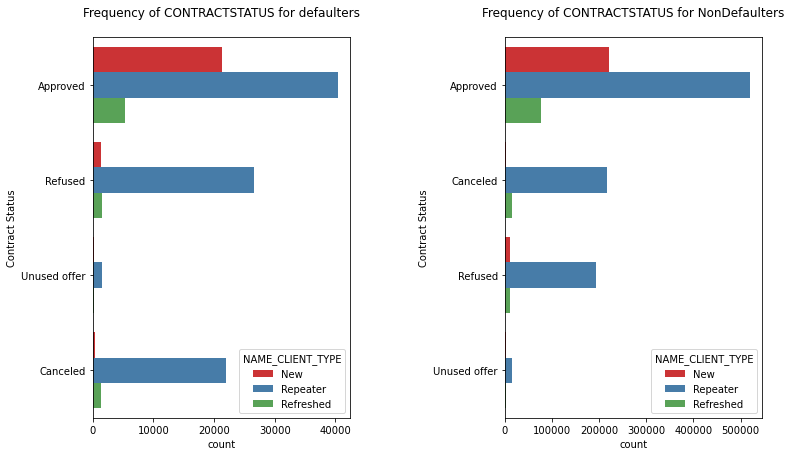

In [54]:
plt.figure(figsize=(12,7))
plt.subplots_adjust(wspace = .6)
vhue=['New','Repeater','Refreshed']
#Contract Status countplot for Defaulters
plt.subplot(121)
sns.countplot(y=target1["NAME_CONTRACT_STATUS"],
              hue=target1["NAME_CLIENT_TYPE"],hue_order=vhue,palette="Set1"
             )
plt.ylabel("Contract Status")
plt.title("Frequency of CONTRACTSTATUS for defaulters\n",color ="k")

#Contract Status countplot for NonDefaulters
plt.subplot(122)
sns.countplot(y=target0["NAME_CONTRACT_STATUS"],
              hue=target0["NAME_CLIENT_TYPE"],hue_order=vhue,palette="Set1"
             )
plt.ylabel("Contract Status")
plt.title("Frequency of CONTRACTSTATUS for NonDefaulters\n")
plt.show()

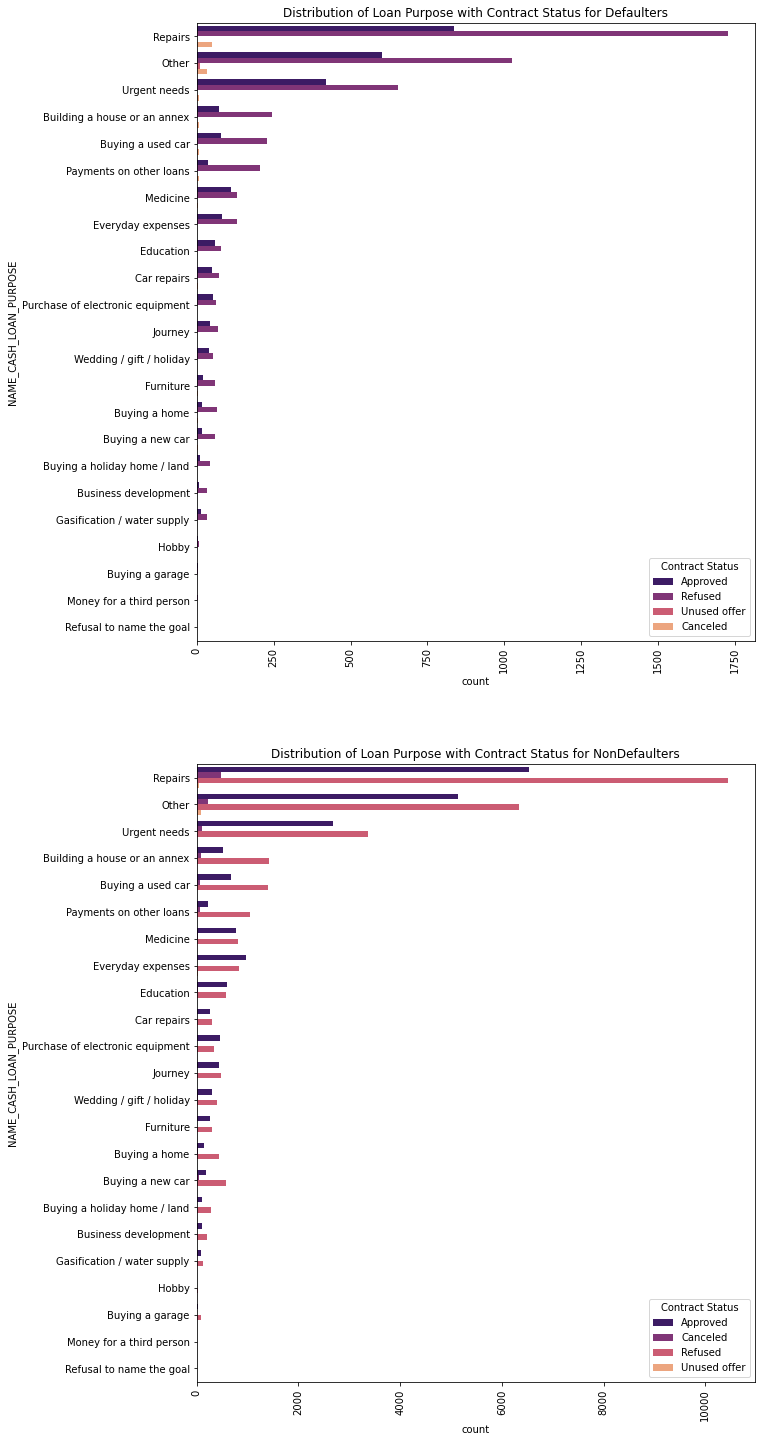

In [55]:
plt.figure(figsize=[10,25])
plt.subplots_adjust(hspace = 0.2)
plt.subplot(2,1,1)
#Loan purpose distribution for Defaulters and NonDefaulters
sns.countplot(data = target1, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=target1['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='magma')
plt.title('Distribution of Loan Purpose with Contract Status for Defaulters')
plt.xticks(rotation=90)
plt.legend(title='Contract Status',loc=4)

plt.subplot(2,1,2)
sns.countplot(data = target0, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=target1['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='magma')
plt.legend(title='Contract Status',loc=4)
plt.xticks(rotation=90)
plt.title('Distribution of Loan Purpose with Contract Status for NonDefaulters')
plt.show()

As we can observe in above graph, defaulter loan is mostly approved and rejected for Repairs purpose.
Also applicants applying loan for Repairs are most likely to be defaulters
Loan applications for Business Development and Gasification/water supply are less prone to being defaulters

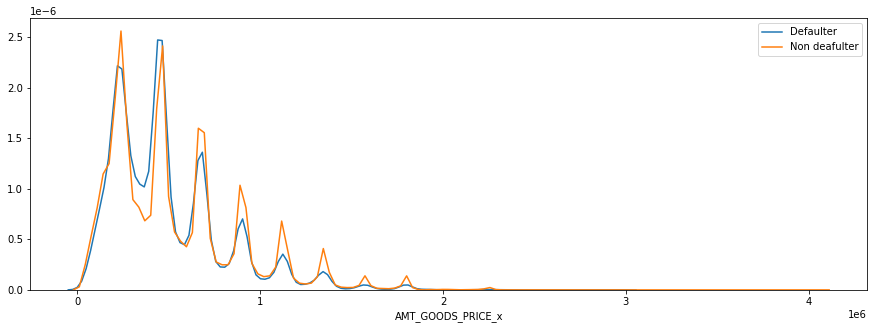

In [56]:
# Goods Price distribution for defaulter and nondefaulter
plt.figure(figsize=(15,5))
sns.distplot(target1['AMT_GOODS_PRICE_x'],label='Defaulter',hist = False)
sns.distplot(target0['AMT_GOODS_PRICE_x'],label='Non deafulter',hist = False)
plt.show()

#### Bivariate Analysis for Numeric-Categorical variables

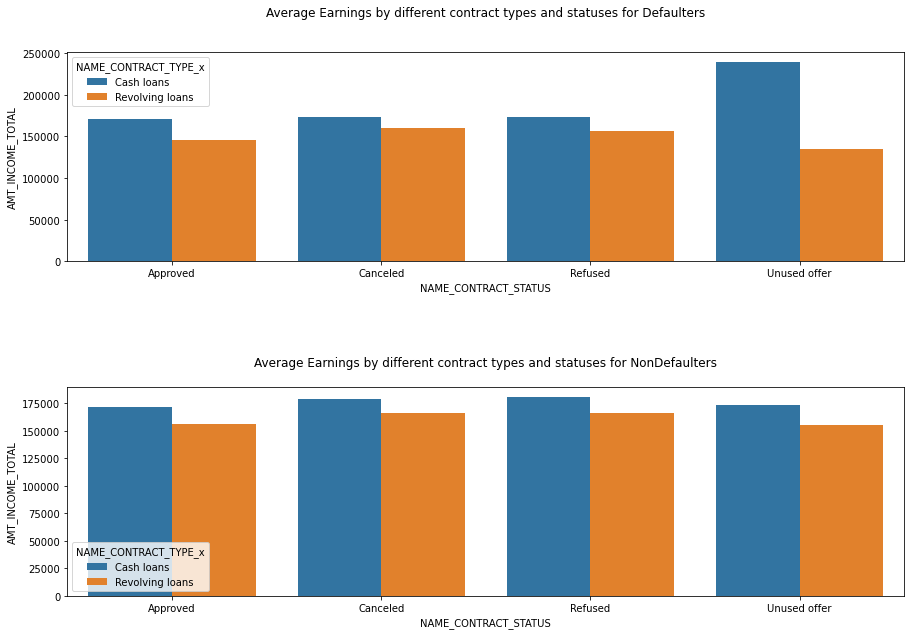

In [57]:
plt.figure(figsize=(15,10))
plt.subplots_adjust(hspace = .6)

#Contract Status VS Income Total for defaulters
plt.subplot(2,1,1)
inc = target1.groupby(['NAME_CONTRACT_TYPE_x','NAME_CONTRACT_STATUS'])['AMT_INCOME_TOTAL'].mean().reset_index()
sns.barplot('NAME_CONTRACT_STATUS','AMT_INCOME_TOTAL',data=inc,hue='NAME_CONTRACT_TYPE_x')
plt.title("Average Earnings by different contract types and statuses for Defaulters\n\n")

#Contract Status VS Income Total for Nondefaulters
plt.subplot(2,1,2)
inc = target0.groupby(['NAME_CONTRACT_TYPE_x','NAME_CONTRACT_STATUS'])['AMT_INCOME_TOTAL'].mean().reset_index()
sns.barplot('NAME_CONTRACT_STATUS','AMT_INCOME_TOTAL',data=inc,hue='NAME_CONTRACT_TYPE_x')
plt.title("\nAverage Earnings by different contract types and statuses for NonDefaulters\n")
plt.legend(title='NAME_CONTRACT_TYPE_x',loc=3)
plt.show()